In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import unwrap_phase

In [2]:
##Taken from some website : http://algassert.com/post/1710
def fast_fractional_fourier_transform(vec, exponent):
    # Compute Fourier transform powers of vec.
    f0 = np.array(vec)
    f1 = np.fft.fftshift(np.fft.fft(f0, norm='ortho'))
    f2 = negate_permutation(f0)
    f3 = negate_permutation(f1)

    # Derive eigenbasis vectors from vec's Fourier transform powers.
    b0 = f0 + f1 + f2 + f3
    b1 = f0 + 1j*f1 - f2 - 1j*f3
    b2 = f0 - f1 + f2 - f3
    b3 = f0 - 1j*f1 - f2 + 1j*f3
    # Note: vec == (b0 + b1 + b2 + b3) / 4

    # Phase eigenbasis vectors by their eigenvalues raised to the exponent.
    b1 *= 1j**exponent
    b2 *= 1j**(2*exponent)
    b3 *= 1j**(3*exponent)

    # Recombine transformed basis vectors to get transformed vec.
    return (b0 + b1 + b2 + b3) / 4


def negate_permutation(vec):
    """Returns the result of applying an FFT to the given vector twice."""
    head, tail = vec[:1], vec[1:]
    return np.concatenate((head, tail[::-1]))

In [3]:
N = 100
x = np.zeros(N)
x[int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1

In [4]:
y = fast_fractional_fourier_transform(x,3)

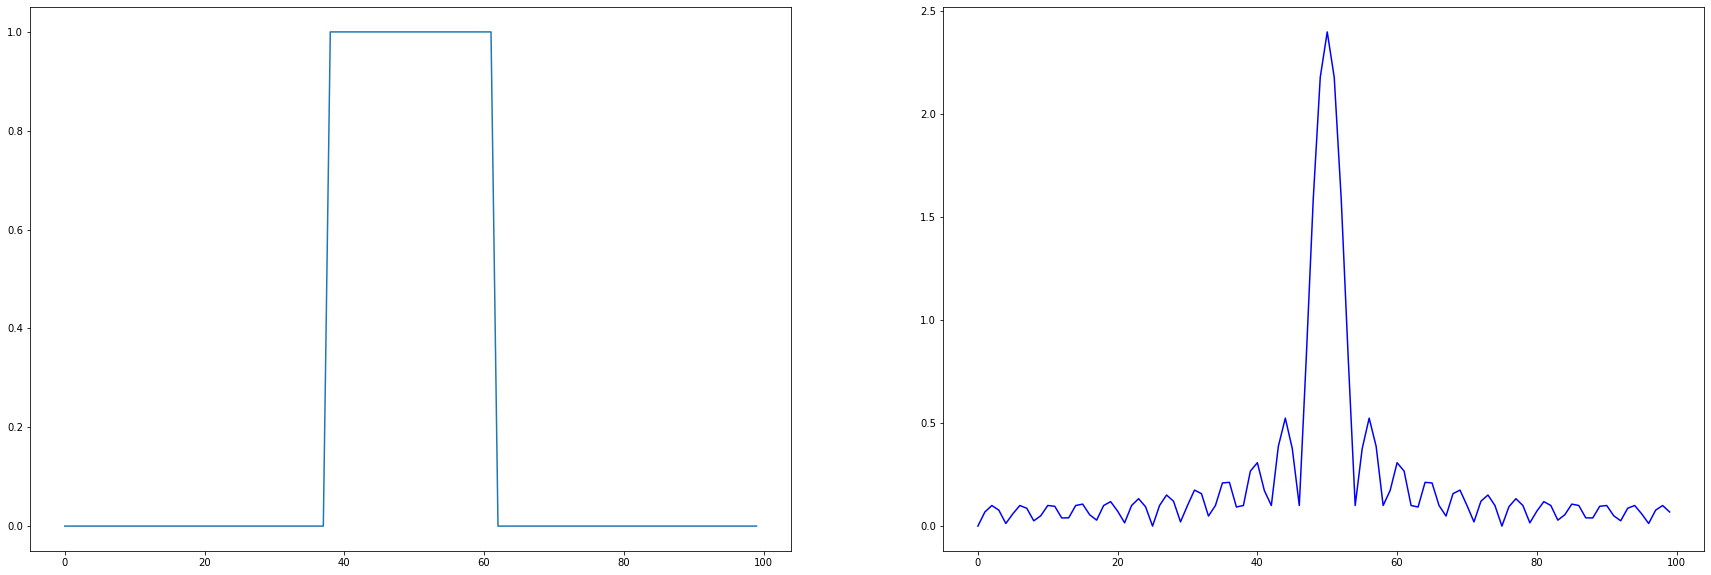

In [5]:
f,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(x)
ax2.plot(np.abs(y),'b-')
#ax2.plot(unwrap_phase(np.angle(y)),'g*')
f.set_size_inches(30, 10, forward=True)
plt.show()